<a href="https://colab.research.google.com/github/Cypher-A/Stock_Price_Prediction/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# Define the ticker symbol
ticker = 'AAPL'  # You can change this to any stock ticker you want

# Get historical data for the past 5 years
data = yf.download(ticker, start='2018-01-01', end='2023-12-31')

# Display the first few rows
data.head()


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.568928,102223600
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.561867,118071600
2018-01-04,43.134998,43.367500,43.020000,43.257500,40.750271,89738400
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.214214,94640000
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.061150,82271200


In [ ]:
# Check for missing values
print(data.isnull().sum())

# Fill missing values using forward fill
data.fillna(method='ffill', inplace=True)

# Create moving averages
data['MA50'] = data['Close'].rolling(window=50).mean()
data['MA200'] = data['Close'].rolling(window=200).mean()

# Drop rows with NaN values
data.dropna(inplace=True)

# Display the updated dataset
data.head()


Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


<ipython-input-3-152ea308ec8f>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


,Open,High,Low,Close,Adj Close,Volume,MA50,MA200
Date,,,,,,,,
2018-10-16,54.732498,55.747501,54.189999,55.537498,52.919334,116736000,54.92185,47.399888
2018-10-17,55.575001,55.660000,54.834999,55.297501,52.690647,91541600,54.99225,47.461050
2018-10-18,54.465000,54.935001,53.250000,54.005001,51.459091,130325200,55.03610,47.515788
2018-10-19,54.514999,55.314999,54.357498,54.827499,52.242809,132314800,55.08825,47.573638
2018-10-22,54.947498,55.840000,54.735001,55.162498,52.562019,115168400,55.15385,47.630700


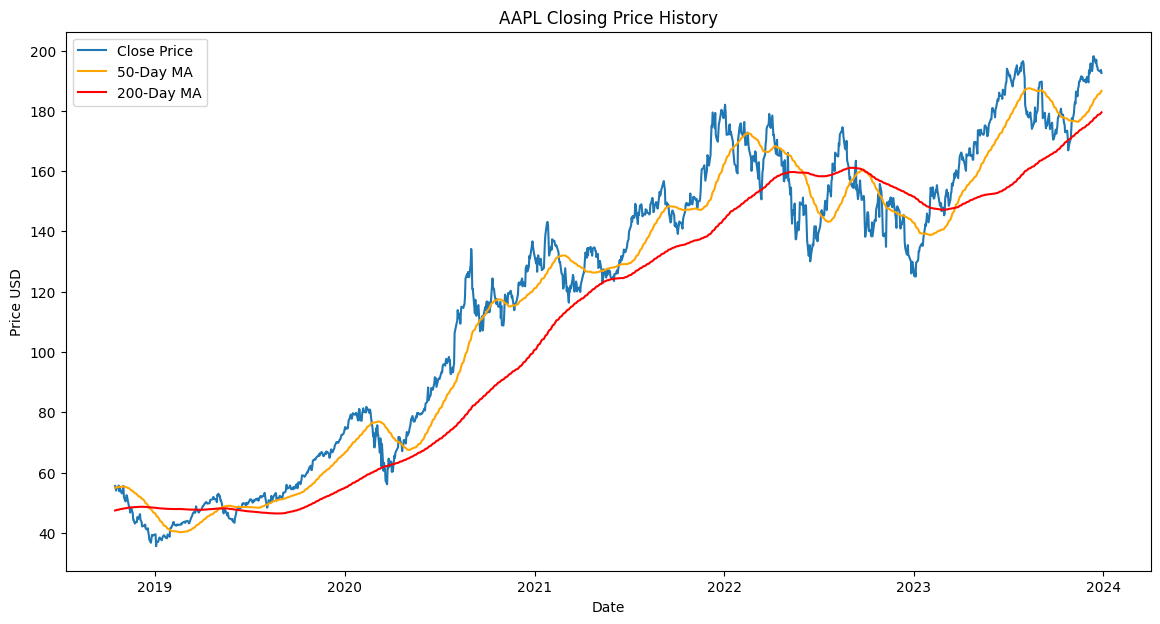

In [ ]:
# Plot Closing Price with Moving Averages
plt.figure(figsize=(14,7))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['MA50'], label='50-Day MA', color='orange')
plt.plot(data['MA200'], label='200-Day MA', color='red')
plt.title(f'{ticker} Closing Price History')
plt.xlabel('Date')
plt.ylabel('Price USD')
plt.legend()
plt.show()


In [ ]:
# Use the closing price and moving averages as features
X = data[['MA50', 'MA200']]
y = data['Close']  # Target variable: closing price

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Train Size: {len(X_train)}, Test Size: {len(X_test)}')


Train Size: 1048, Test Size: 262


In [ ]:
# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 69.1864739106471


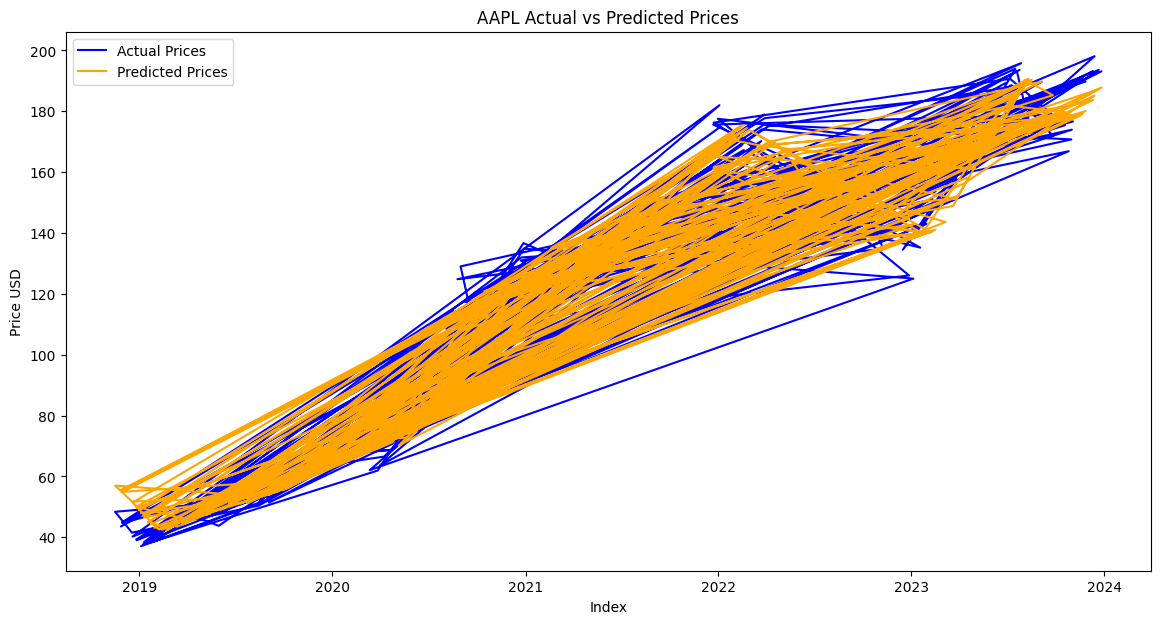

In [ ]:
# Create a DataFrame for actual vs predicted
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Plot actual vs predicted prices
plt.figure(figsize=(14,7))
plt.plot(predictions['Actual'], label='Actual Prices', color='blue')
plt.plot(predictions['Predicted'], label='Predicted Prices', color='orange')
plt.title(f'{ticker} Actual vs Predicted Prices')
plt.xlabel('Index')
plt.ylabel('Price USD')
plt.legend()
plt.show()


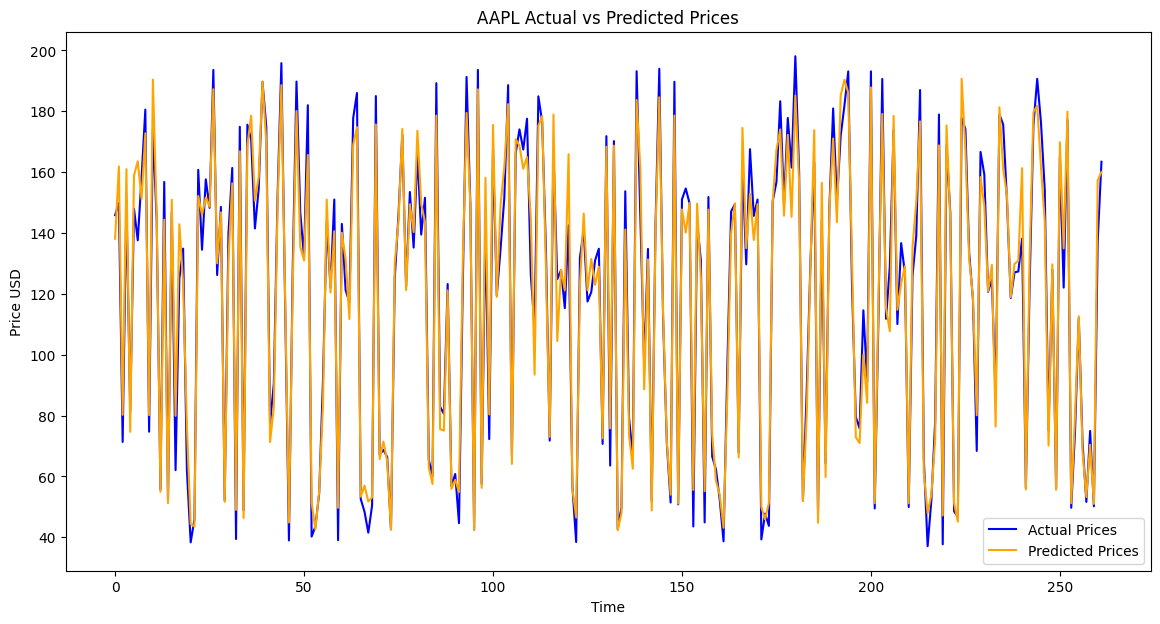

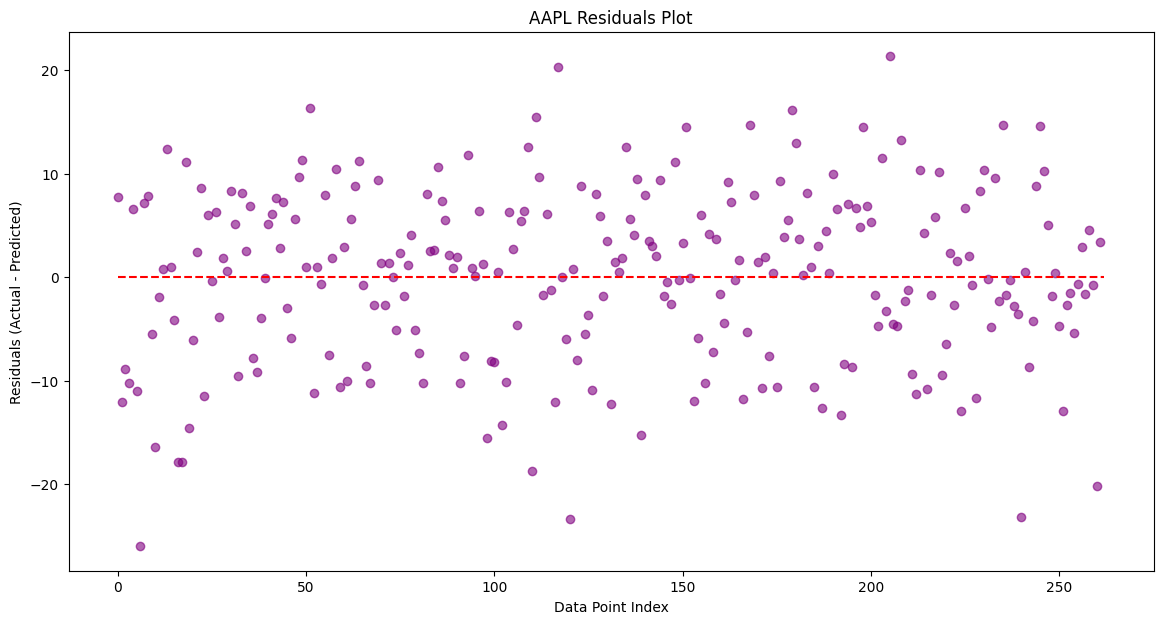

In [ ]:
# 1. Actual vs Predicted Prices (Line Plot)
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
predictions.reset_index(drop=True, inplace=True)

plt.figure(figsize=(14,7))
plt.plot(predictions['Actual'].values, label='Actual Prices', color='blue')
plt.plot(predictions['Predicted'].values, label='Predicted Prices', color='orange')
plt.title(f'{ticker} Actual vs Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Price USD')
plt.legend()
plt.show()

# 2. Residuals Plot (Scatter Plot)
residuals = y_test - y_pred

plt.figure(figsize=(14,7))
plt.scatter(range(len(residuals)), residuals, color='purple', alpha=0.6)
plt.hlines(y=0, xmin=0, xmax=len(residuals), colors='red', linestyles='dashed')
plt.title(f'{ticker} Residuals Plot')
plt.xlabel('Data Point Index')
plt.ylabel('Residuals (Actual - Predicted)')
plt.show()


In [ ]:
!git --version

git version 2.34.1


In [4]:
!git config --global user.name "Cypher-A"
!git config --global user.email "poddar01arya@gmail.com"


In [5]:
# Replace the URL with your repository's URL
!git clone https://github.com/Cypher-A/Stock_Price_Prediction.git


Cloning into 'Stock_Price_Prediction'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 4 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (4/4), done.


In [7]:
import os
os.chdir('Stock_Price_Prediction')

In [11]:
# Replace 'YourNotebook.ipynb' with your notebook's name
!mv /content/Stock_Price_Prediction/


mv: missing destination file operand after '/content/Stock_Price_Prediction/'
Try 'mv --help' for more information.


In [12]:
!ls /content/


sample_data  StockMarketAnalysis  Stock_Price_Prediction


In [18]:
# Replace 'YourNotebook.ipynb' with your notebook's name
!mv /content/Stock_Price_Prediction.ipynb /content/Stock_Price_Prediction/


mv: cannot stat '/content/Stock_Price_Prediction.ipynb': No such file or directory


In [21]:
!ls /content/Stock_Price_Prediction.ipynb/

ls: cannot access '/content/Stock_Price_Prediction.ipynb/': No such file or directory
